<a href="https://colab.research.google.com/github/WMaia9/Deep-Learning-Specialization/blob/main/EDA_produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Autenticação é necessária para clonar
from google.colab import auth, output, files
import os
auth.authenticate_user()

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (16,8)})


import seaborn as sns

output.clear()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
path = "/content/drive/Shareddrives/MAI5003/EDA/dataset_produtos.xlsx"
df = pd.read_excel(path)

In [ ]:
df.head()

,nm_item,segmento,categoria,subcategoria,nm_product
0,APRESUNTADO REZENDE PEC KG,1-BENS DE CONSUMO,3-FRIOS E LATICINIOS,6-EMBUTIDOS,APRESUNTADO
1,CARNE SUIN ESPINHACO KG,1-BENS DE CONSUMO,1-ACOUGUE E PEIXARIA,1-ACOUGUE,CARNE SUINA
2,WHISKY WHITE 1LHORSE TRAD.,1-BENS DE CONSUMO,18-BEBIDAS ALCOOLICAS,56-DESTILADOS,WHISKY
3,WHISKY JOHNN WALKER 1L UNRED LABEL.,1-BENS DE CONSUMO,18-BEBIDAS ALCOOLICAS,56-DESTILADOS,WHISKY
4,LTE COND MOCASEMI DESN TP 395G.,1-BENS DE CONSUMO,6-MERCEARIA,22-MERCEARIA LACTEA,LEITE CONDENSADO


In [ ]:
df.isna().mean()

nm_item         0.0
segmento        0.0
categoria       0.0
subcategoria    0.0
nm_product      0.0
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().mean()

nm_item         0.0
segmento        0.0
categoria       0.0
subcategoria    0.0
nm_product      0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158113 entries, 0 to 158112
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nm_item       158113 non-null  object
 1   segmento      158113 non-null  object
 2   categoria     158113 non-null  object
 3   subcategoria  158113 non-null  object
 4   nm_product    158113 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


# Olhando as diferentes classes de estratificação

## 1 - Segmento

In [ ]:
df.segmento.unique()

array(['1-BENS DE CONSUMO', '5-HEALTHCARE', '2-CASA E CONSTRUCAO',
       '4-FASHION E ESPORTIVO', '3-ELETROMOVEIS', '6-PETROQUIMICA'],
      dtype=object)

In [ ]:
print(f"Existem {len(df.segmento.unique())} classes diferentes de segmento")

Existem 6 classes diferentes de segmento


In [ ]:
segmento = df.groupby('segmento').size().sort_values(ascending = False)
segmento = segmento.reset_index()
segmento.columns = ['segmento', 'count']
segmento['%'] = (100 * segmento['count'] / segmento['count'].sum()).round(2)
segmento

,segmento,count,%
0,1-BENS DE CONSUMO,152526,96.47
1,2-CASA E CONSTRUCAO,1992,1.26
2,5-HEALTHCARE,1789,1.13
3,4-FASHION E ESPORTIVO,1259,0.80
4,3-ELETROMOVEIS,361,0.23
5,6-PETROQUIMICA,186,0.12


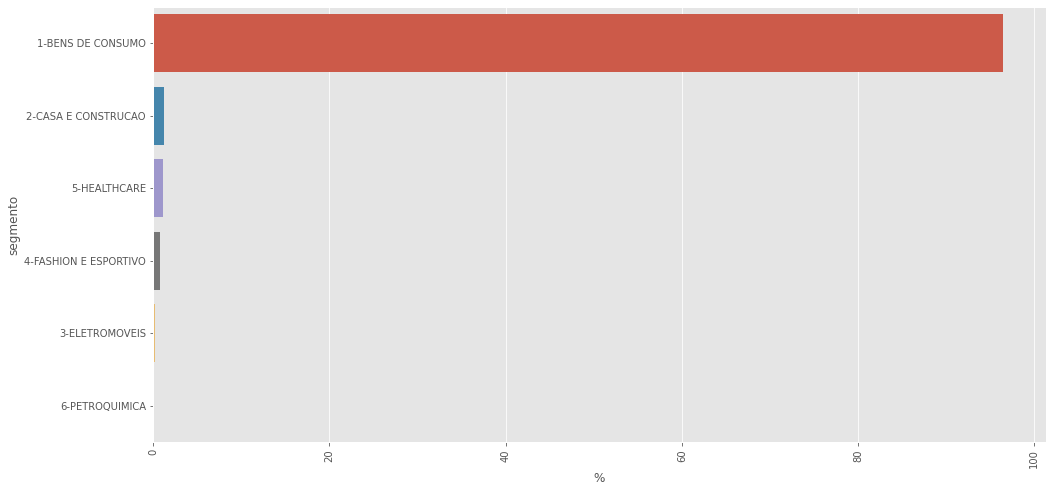

In [ ]:
sns.barplot(data = segmento.head(15), y = 'segmento', x = '%')
plt.xticks(rotation=90);

## 2 - Categoria

In [ ]:
print(f"Existem {len(df.categoria.unique())} classes diferentes de categoria")

Existem 70 classes diferentes de categoria


In [ ]:
df[df['segmento'] == '1-BENS DE CONSUMO'].groupby('categoria').size().sort_values(ascending = False)[:5]

categoria
6-MERCEARIA                  48320
32-PRODUTOS DE LIMPEZA       13834
3-FRIOS E LATICINIOS         13299
31-HIGIENE PESSOAL           12158
8-PREPARADOS E CONGELADOS     7018
dtype: int64

In [ ]:
bens = pd.DataFrame(df[df['segmento'] == '1-BENS DE CONSUMO'].groupby('categoria').size().sort_values(ascending = False))
bens = bens.reset_index()
bens.columns = ['categoria', 'count']
bens['%'] = (100 * bens['count'] / bens['count'].sum()).round(2)
bens.head(10)

,categoria,count,%
0,6-MERCEARIA,48320,31.68
1,32-PRODUTOS DE LIMPEZA,13834,9.07
2,3-FRIOS E LATICINIOS,13299,8.72
3,31-HIGIENE PESSOAL,12158,7.97
4,8-PREPARADOS E CONGELADOS,7018,4.60
5,5-HORTIFRUTI (FLV),6353,4.17
6,1-ACOUGUE E PEIXARIA,6328,4.15
7,7-PADARIA E CONFEITARIA,5716,3.75
8,24-SUCOS E REFRESCOS,5080,3.33
9,18-BEBIDAS ALCOOLICAS,4626,3.03


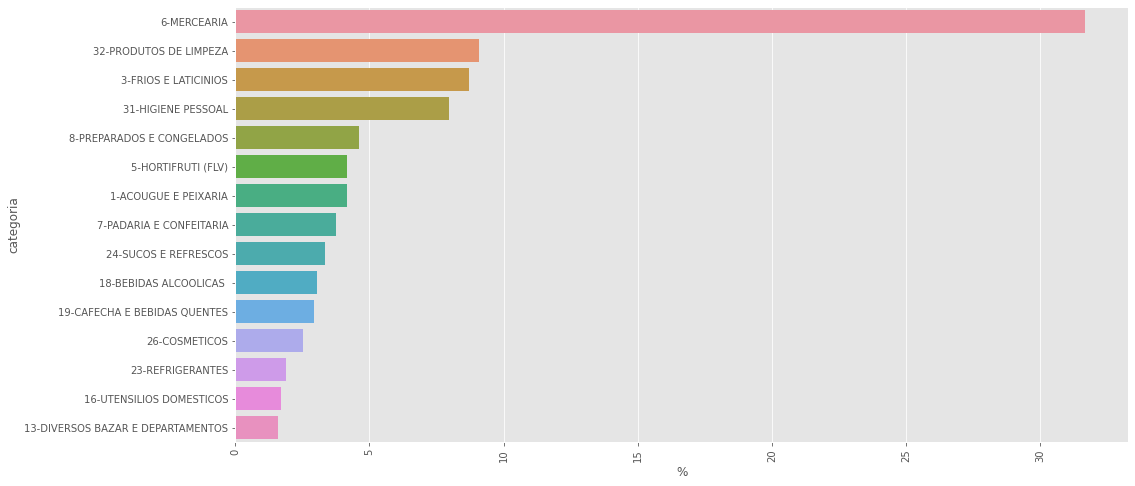

In [ ]:
sns.barplot(data = bens.head(15), y = 'categoria', x = '%')
plt.xticks(rotation=90);

In [ ]:
df[df['segmento'] == '5-HEALTHCARE'].groupby('categoria').size().sort_values(ascending = False)

categoria
72-OUTROS FARMA                   1529
67-ENFERMAGEM E INSTRUMENTACAO     233
68-HOMECARE                         11
76-CLINICAS E LABORATORIOS           5
73-SAUDE ANIMAL                      4
69-HOSPITALARES E CLINICOS           3
75-OUTROS HEALTHCARE                 2
71-MEDICAMENTOS                      1
74-SUPLEMENTOS                       1
dtype: int64

In [ ]:
df[df['segmento'] == '2-CASA E CONSTRUCAO'].groupby('categoria').size().sort_values(ascending = False)

categoria
39-DIVERSOS DECORACAO E JARDIM            924
38-CAMAMESA E BANHO                       464
40-ILUMINACAO                             181
47-BANHEIROCOZINHA E LAVANDERIA           125
41-TAPETES E CORTINAS                      56
46-ACABAMENTO                              53
44-FERRAGENS E FERRAMENTAS                 52
49-ELETRICA                                47
36-AREA DE LAZER                           30
52-PINTURA E VEDACAO                       21
51-HIDRAULICA E GAS                        15
37-ARTIGOS DE DECORACAO                    11
45-DIVERSOS HOME CENTER                     6
43-EQUIPAMENTOS                             4
42-DIVERSOS FERRAMENTAS E EQUIPAMENTOS      3
dtype: int64

## 3 - Subcategoria

In [ ]:
print(f"Existem {len(df.subcategoria.unique())} classes diferentes de subcategoria")

Existem 153 classes diferentes de subcategoria
